In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# save_path = "/beegfs/home/r.kail/faces/figures/22_dataset_distribution/merged/different_datasets.pdf"
# datasaets_paths = {
#     "IJBC": "/beegfs/home/r.kail/faces/figures/22_dataset_distribution/IJBC/sigm_64/uncertainties.npy",
#     "LFW": "/beegfs/home/r.kail/faces/figures/22_dataset_distribution/LFW/sigm_64/uncertainties.npy",
#     "MS1MV2": "/beegfs/home/r.kail/faces/figures/22_dataset_distribution/MS1MV2/sigm_64/uncertainties.npy",
# }

save_path = "/beegfs/home/r.kail/faces/figures/22_dataset_distribution/merged/blurred.pdf"
datasets_paths = {
    f"kernel_size={idx}": f"/beegfs/home/r.kail/faces/figures/22_dataset_distribution/blurred_IJBC/sigm_32/{idx}/uncertainties.npy" \
    for idx in (1, 2, 3, 4, 5)
}

In [30]:
datasets_uncertainties = {name: np.load(path) for name, path in datasets_paths.items()}

In [37]:
def plot_distributions(
    datasets_uncertainties, save_fig_path, n_bins=50,
    fig_name="", xlabel_name="", ylabel_name="",
):
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = ["b", "g", "y", "r"]

    for (name, values), color in zip(datasets_uncertainties.items(), colors):
        ax.hist(values, bins=n_bins, density=True, color=color, alpha=0.3, label=name)

    ax.set_title(fig_name)
    ax.set_xlabel(xlabel_name)
    ax.set_ylabel(ylabel_name)
    ax.legend()

    if save_fig_path:
        fig.savefig(save_fig_path, dpi=400)

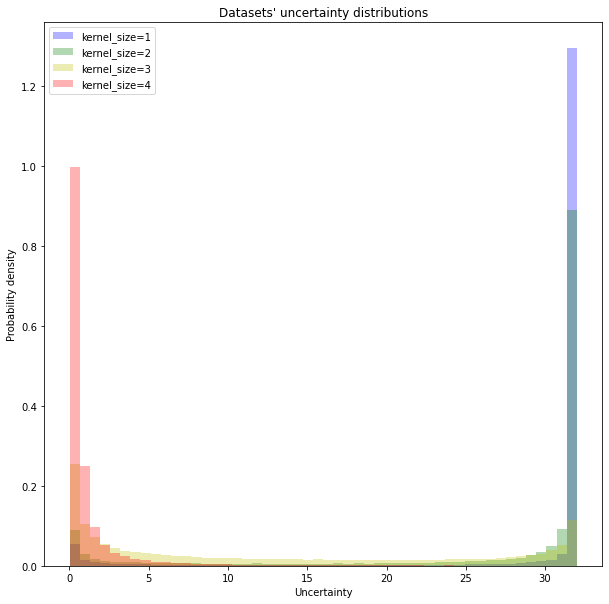

In [38]:
plot_distributions(
    datasets_uncertainties=datasets_uncertainties,
    save_fig_path=save_path,
    n_bins=50,
    fig_name="Datasets' uncertainty distributions",
    xlabel_name="Uncertainty",
    ylabel_name="Probability density",
)

In [ ]:
def get_loaded_uncertainties(paths):
    return [np.load(p) for p in paths]

def get_means_and_stds(uncertainties):
    means = np.array([u.mean() for u in uncertainties])
    stds = np.array([u.std() for u in uncertainties])
    return means, stds

def get_median_quantiles(uncertainties, lower_quantile=0.25, upper_quantile=0.75):
    lower = np.array([np.quantile(u, q=lower_quantile) for u in uncertainties])
    median = np.array([np.quantile(u, q=0.5) for u in uncertainties])
    upper = np.array([np.quantile(u, q=upper_quantile) for u in uncertainties])
    return np.array(lower), np.array(median), np.array(upper)

def get_median_quantiles_2(uncertainties, lower_quantile=0.17, upper_quantile=0.83, super_lower_quantile=0.025, super_upper_quantile=0.975):
    median = np.array([np.quantile(u, q=0.5) for u in uncertainties])
    lower = np.array([np.quantile(u, q=lower_quantile) for u in uncertainties])
    upper = np.array([np.quantile(u, q=upper_quantile) for u in uncertainties])
    super_lower = np.array([np.quantile(u, q=super_lower_quantile) for u in uncertainties])
    super_upper = np.array([np.quantile(u, q=super_upper_quantile) for u in uncertainties])
    return np.array(median), np.array(lower), np.array(upper), np.array(super_lower), np.array(super_upper)

def plot_with_stds(X, Y, errors, ax=None, xlabel=None, ylabel=None):
    if ax is None:
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
        
    ax.errorbar(X, Y, yerr=errors, marker=".")
#     ax.set_ylim(0, 32)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
        
def plot_quantiles(x, median, lower, upper, ax=None, xlabel=None, ylabel=None):
    if ax is None:
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
        
    ax.plot(x, median, marker=".")
    ax.fill_between(x, lower, upper, alpha=0.4)
    
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    
def plot_quantiles_2(x, median, lower, upper, super_lower, super_upper, ax=None, xlabel=None, ylabel=None):
    if ax is None:
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
        
    ax.plot(x, median, marker=".")
    ax.fill_between(x, lower, upper, alpha=0.4)
    ax.fill_between(x, super_lower, super_upper, alpha=0.2)
    
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    

In [ ]:
save_path = "/beegfs/home/r.kail/faces/figures/22_dataset_distribution/merged/blurred_mean.pdf"
blur_kernel_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
datasets_paths = [f"/beegfs/home/r.kail/faces/figures/22_dataset_distribution/blurred_IJBC/sigm_32/{idx}/uncertainties.npy" \
    for idx in blur_kernel_sizes
]

In [ ]:
# means, stds = get_means_and_stds(get_loaded_uncertainties(datasets_paths))

# lower, median, upper = get_median_quantiles(get_loaded_uncertainties(datasets_paths))
median, lower, upper, super_lower, super_upper = get_median_quantiles_2(get_loaded_uncertainties(datasets_paths))

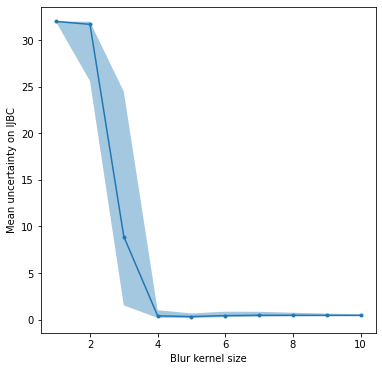

In [97]:
# plot_with_stds(blur_kernel_sizes, means, stds, xlabel="Blur kernel size", ylabel="Mean uncertainty on IJBC")

plot_quantiles(blur_kernel_sizes, median, lower, upper, xlabel="Blur kernel size", ylabel="Mean uncertainty on IJBC")